# Linear Regression

Linear regression is a statistical method used to find the relationship between two variables by fitting a straight line that best predicts one variable from another.

In [2]:
# importing all libraries

import numpy as np

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

# Sample data

stamps_bought=np.array([1,3,5,7,9]).reshape((-1,1))

amt_spent=np.array([100,300,500,700,900])

model=LinearRegression()

model.fit(stamps_bought,amt_spent)

#predicting values

next_month=int(input("Enter the number of stamps in Next Month : "))

predicted_value=model.predict([[next_month]])

print("Predicted Value : ",predicted_value)

Enter the number of stamps in Next Month : 10
Predicted Value :  [1000.]


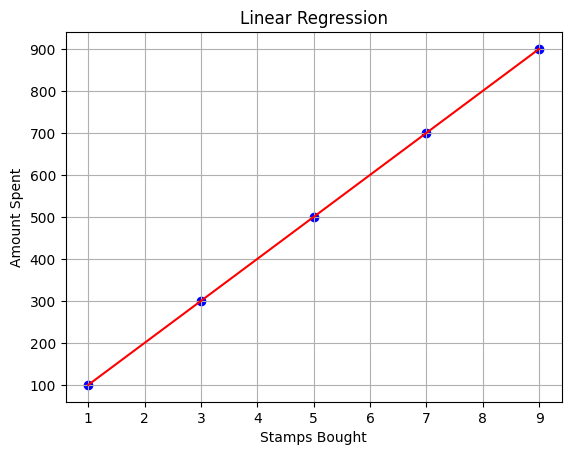

In [4]:
plt.scatter(stamps_bought ,amt_spent,color='blue')

plt.plot(stamps_bought,model.predict(stamps_bought),color='red')

plt.xlabel("Stamps Bought")

plt.ylabel("Amount Spent")

plt.title("Linear Regression")

plt.grid(True)

plt.show()

Types of linear regression :
1. simple linear regression ;  which uses one independent variable to predict a dependent variable
2. multiple linear regression :  which uses two or more independent variables to predict a dependent variable

In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rupakroy/1000-companies-profit")

print("Path to dataset files:", path)

100%|██████████| 22.7k/22.7k [00:00<00:00, 26.8MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/rupakroy/1000-companies-profit/versions/1


In [6]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error,r2_score

# Corrected path to include the filename
companies=pd.read_csv('/root/.cache/kagglehub/datasets/rupakroy/1000-companies-profit/versions/1/1000_Companies.csv')

print(companies.head())

X=companies.iloc[:,:-1]

Y=companies.iloc[:,-1]

   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94


<Axes: >

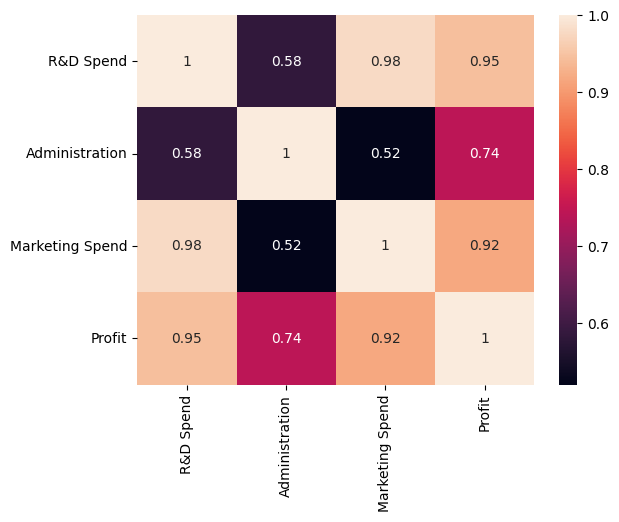

In [7]:
sns.heatmap(companies.drop('State', axis=1).corr(),annot=True)

In [8]:
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import OneHotEncoder

# Apply OneHotEncoder to the 'State' column (index 3)
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')

X = ct.fit_transform(X)

# Avoid the dummy variable trap
X = X[:, 1:]

In [9]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

from sklearn.linear_model import LinearRegression

model=LinearRegression()

model.fit(X_train,Y_train)

Y_pred=model.predict(X_test)

Y_pred

array([ 89790.61532915,  88427.07187361,  94894.67836971, 175680.86725611,
        83411.73042088, 110571.90200074, 132145.2293644 ,  91473.37719686,
       164597.05380607,  53222.826674  ,  66950.19050989, 150566.43987005,
       126915.20858596,  59337.85971049, 177513.91053062,  75316.2814305 ,
       118248.14406603, 164574.40699902, 170937.2898107 , 182069.11645085,
       118845.03252689,  85669.95112228, 180992.59396144,  84145.08220144,
       105005.83769214, 101233.56772746,  53831.0766909 ,  56881.41475223,
        68896.39346904, 210040.00765885, 120778.72270894, 111724.87157654,
       101487.90541517, 137959.02649624,  63969.95996742, 108857.91214126,
       186014.72531989, 171442.64130748, 174644.26529205, 117671.49128195,
        96731.37857433, 165452.2577941 , 107724.34331255,  50194.54176912,
       116513.89532179,  58632.4898682 , 158416.4682761 ,  78541.48521609,
       159727.66671744, 131137.87699644, 184880.70924517, 174609.08266881,
        93745.66352058,  

In [11]:
print(model.coef_)

[-8.80536598e+02 -6.98169073e+02  5.25845857e-01  8.44390881e-01
  1.07574255e-01]


In [12]:
print(model.intercept_)

-51035.229724047706


In [13]:
from sklearn.metrics import mean_squared_error,r2_score

mse=mean_squared_error(Y_test,Y_pred)

r2_score=r2_score(Y_test,Y_pred)

print(f'R2_score of an Linear Regression : {r2_score}')

R2_score of an Linear Regression : 0.9112695892268908
